In [67]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.utils import plot_model

In [26]:
iris=load_iris()

In [27]:
#Exploring data

In [28]:
#Loading into dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
#append target and name it label
df['label']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [30]:
#use string label instaed
df['label']=df.label.replace(dict(enumerate(iris.target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
#Preparing data for keras and tensorflow

In [32]:
#label one hot encoding
label=pd.get_dummies(df['label'])
label.columns=['label_' +str(x)for x in label.columns]
df=pd.concat([df,label],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [33]:
#drop the old column label
df.drop(['label'],axis=1,inplace=True)

In [34]:
#Creating x and y
X=df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
#converting dataframe into np array
X=np.asarray(X)

y=df[['label_setosa','label_versicolor','label_virginica',]]
#covert dataframe into nparray
y=np.asarray(y)

In [35]:
print(X[:10])
print(y[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [36]:
#splitting the data in training(75%)remaining(25%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [37]:
#Funtional API

In [38]:
#This return o tensor
input=Input(shape=(4,))
#a layer instance is collable on a tensor and return 0 tensor
x=Dense(7,activation='relu')(input)
x=Dense(10,activation='relu')(x)
outputs=Dense(3,activation='softmax')(x)
#this create a model that includes
#The input layer and 3 dense layer
model_fun_api=Model(inputs=input,outputs=outputs)
model_fun_api.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 35        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                80        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 33        
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


In [39]:
model_fun_api.compile(
                 optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy']
)

In [40]:
#Then train the model with fit
history=model_fun_api.fit(X_train,y_train,
                          batch_size=64,
                          epochs=30,
                          validation_split=0.2)

Epoch 1/30
2/2 [==============================] - 1s 150ms/step - loss: 2.7008 - accuracy: 0.3146 - val_loss: 2.5341 - val_accuracy: 0.3913
Epoch 2/30
2/2 [==============================] - 0s 21ms/step - loss: 2.5938 - accuracy: 0.3146 - val_loss: 2.4389 - val_accuracy: 0.3913
Epoch 3/30
2/2 [==============================] - 0s 32ms/step - loss: 2.4911 - accuracy: 0.3146 - val_loss: 2.3480 - val_accuracy: 0.3913
Epoch 4/30
2/2 [==============================] - 0s 20ms/step - loss: 2.3905 - accuracy: 0.3146 - val_loss: 2.2612 - val_accuracy: 0.3913
Epoch 5/30
2/2 [==============================] - 0s 21ms/step - loss: 2.2964 - accuracy: 0.3146 - val_loss: 2.1780 - val_accuracy: 0.3913
Epoch 6/30
2/2 [==============================] - 0s 21ms/step - loss: 2.2073 - accuracy: 0.3146 - val_loss: 2.0987 - val_accuracy: 0.3913
Epoch 7/30
2/2 [==============================] - 0s 21ms/step - loss: 2.1206 - accuracy: 0.3146 - val_loss: 2.0234 - val_accuracy: 0.3913
Epoch 8/30
2/2 [==========

In [45]:
def plot_metric(history,metrics):
  train_metrics=history.history[metrics]
  val_metrics=history.history['val_'+metrics]
  epochs=range(1,len(train_metrics)+1)
  plt.plot(epochs,train_metrics,'bo--')
  plt.plot(epochs,val_metrics,'ro--')
  plt.title('Training and Validation'+metrics)
  plt.xlabel('Epochs')
  plt.ylabel(metrics)
  plt.legend(['train_'+metrics,'val'+metrics])
  plt.show()

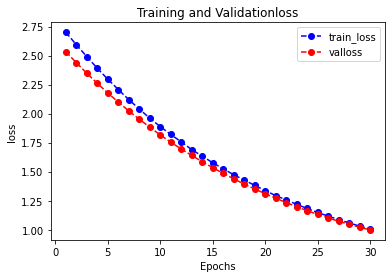

In [46]:
plot_metric(history,'loss')

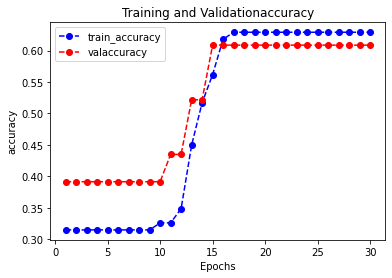

In [48]:
plot_metric(history,'accuracy')

In [50]:
model_fun_api.evaluate(x=X_test,y=y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.8236 - accuracy: 0.7895


[0.8235602378845215, 0.7894737124443054]

In [54]:
##Multi input and multi output model


In [55]:
#2 input and one output

In [59]:
input_structure=Input(shape=(4,),name='input_structure')
input_image=Input(shape=(256),name='input_image')
#middle layer
x1=Dense(10,activation='relu')(input_structure)
x2=Dense(100,activation='relu')(input_image)

c=concatenate([x1,x2])
outputs=Dense(3,activation='softmax',name='outputs')(c)
model=Model(inputs=[input_structure,input_image],outputs=outputs)


In [60]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structure (InputLayer)    [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 10)           50          input_structure[0][0]            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 100)          25700       input_image[0][0]                
____________________________________________________________________________________________

In [61]:
#2 INPUT 2 OUTPUT

In [64]:
input_structure=Input(shape=(4,),name='input_structure')
input_image=Input(shape=(256),name='input_image')
#middle layer
x1=Dense(10,activation='relu')(input_structure)
x2=Dense(300,activation='relu')(input_image)
c=concatenate([x1,x2])
#output layer
output1=Dense(1,activation='sigmoid',name='output1')(c)
output2=Dense(10,activation='softmax',name='output2')(c)
model=Model(inputs=[input_structure,input_image],outputs=[output1,output2])

In [65]:
model.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_structure (InputLayer)    [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_image (InputLayer)        [(None, 256)]        0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 10)           50          input_structure[0][0]            
__________________________________________________________________________________________________
dense_22 (Dense)                (None, 300)          77100       input_image[0][0]                
____________________________________________________________________________________________

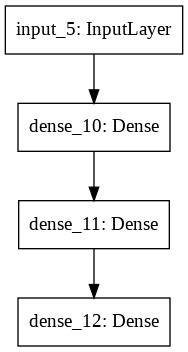

In [68]:
plot_model(model_fun_api)